# Installing Libraries if required

In [ ]:
!pip install tensorflow

# PART 1 - Classification Using MLP

### Importing Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD

### Loading data

In [2]:
data = cifar10.load_data()

In [3]:
(X_train, Y_train), (X_test, Y_test) = data

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
Y_train.shape

(50000, 1)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
Y_test.shape

(10000, 1)

### Defining the name corresponding to each class

In [8]:
categories = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

### Visualising the Images

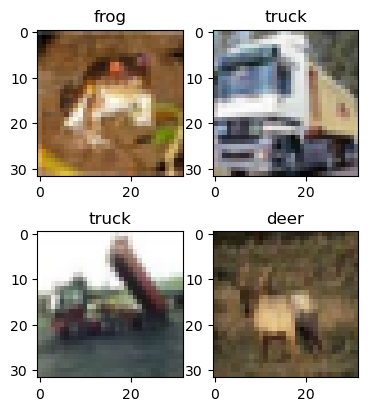

In [9]:
plt.subplot(231, title = categories[Y_train[0][0]])
plt.imshow(X_train[0])
plt.subplot(232, title = categories[Y_train[1][0]])
plt.imshow(X_train[1])
plt.subplot(234, title = categories[Y_train[2][0]])
plt.imshow(X_train[2])
plt.subplot(235, title = categories[Y_train[3][0]])
plt.imshow(X_train[3])

plt.show()

### Processing the Data for further Steps

In [10]:
flattened_len = X_train.shape[1]*X_train.shape[2]*X_train.shape[3]
num_categories = 10

In [11]:
num_train_samples = X_train.shape[0]
num_test_samples = X_test.shape[0]

In [12]:
# Flattening 

X_train = np.reshape(X_train,(50000,3072))
X_test = np.reshape(X_test,(10000,3072))

In [13]:
# Normalising

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [14]:
# One-hot encoding

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

### Creating a Neural Network with three hidden Layers

In [16]:
mlp = Sequential()

mlp.add(Dense(1024, activation='relu'))
mlp.add(Dropout(0.2))
mlp.add(Dense(256, activation='relu'))
mlp.add(Dropout(0.2))
mlp.add(Dense(32, activation='relu'))
mlp.add(Dropout(0.2))
mlp.add(Dense(10, activation='softmax'))
sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)

mlp.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

### Training the model

In [17]:
history = mlp.fit(X_train,Y_train, epochs=25, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/25
1250/1250 [==============================] - 37s 29ms/step - loss: 2.0826 - accuracy: 0.2102 - val_loss: 1.9102 - val_accuracy: 0.3052
Epoch 2/25
1250/1250 [==============================] - 36s 29ms/step - loss: 1.9115 - accuracy: 0.2982 - val_loss: 1.8231 - val_accuracy: 0.3550
Epoch 3/25
1250/1250 [==============================] - 37s 29ms/step - loss: 1.8432 - accuracy: 0.3301 - val_loss: 1.7540 - val_accuracy: 0.3667
Epoch 4/25
1250/1250 [==============================] - 36s 29ms/step - loss: 1.7848 - accuracy: 0.3528 - val_loss: 1.7057 - val_accuracy: 0.3796
Epoch 5/25
1250/1250 [==============================] - 36s 29ms/step - loss: 1.7526 - accuracy: 0.3638 - val_loss: 1.6773 - val_accuracy: 0.3972
Epoch 6/25
1250/1250 [==============================] - 36s 29ms/step - loss: 1.7203 - accuracy: 0.3834 - val_loss: 1.6307 - val_accuracy: 0.4094
Epoch 7/25
1250/1250 [==============================] - 37s 30ms/step - loss: 1.6918 - accuracy: 0.3921 - val_loss: 1.6324 -

### Visualising Loss in each epoch

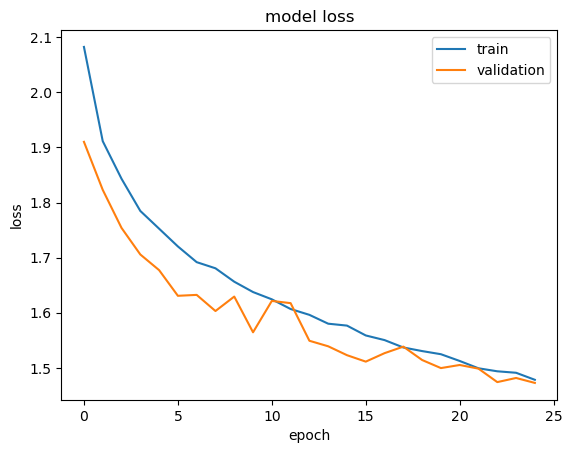

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

### Visualising Accuracy in each epoch

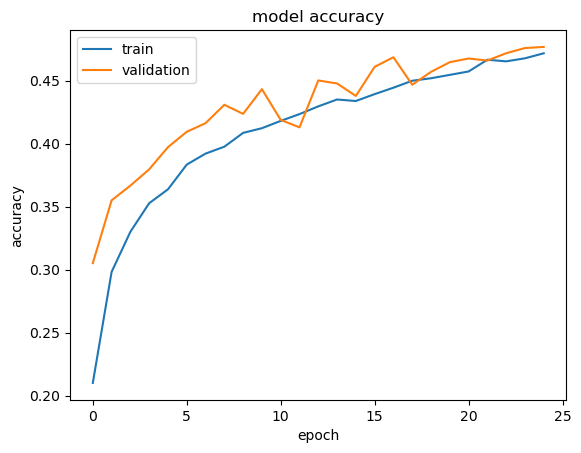

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

### Saving the model

In [87]:
import h5py
mlp.save_weights("Cifar10_MLP_ModelWeights.h5")
mlp_json = mlp.to_json()
with open("Cifar10_MLP_ModelStructure.json", "w") as json_file:
    json_file.write(mlp_json)

#### We saw that the accuracy obtained using MLP on CIFAR10 dataset is only around 50%. <br> Therefore, trying advanced techniques to improve the accuracy.

# Part 2 - Classification Using CNN

### Importing additional Libraries

In [70]:
from tensorflow.keras.layers import Flatten, Conv2D
from tensorflow.keras.models import model_from_json

### Reloading test and training data

In [71]:
(X_train, Y_train), (X_test, Y_test) = data

In [72]:
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [73]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

### Defining A CNN based model, with one initial convolution, three Layers, and one hidden Dense layer

In [74]:
cnn = Sequential()

In [75]:
cnn.add(Conv2D(
    filters = 16, 
    kernel_size = 3,
    strides = (1,1),
    padding = 'valid',
    activation = 'relu',
    input_shape = (32,32,3)
))

cnn.add(Conv2D(
    filters = 16, 
    kernel_size = 3,
    strides = (1,1),
    padding = 'valid',
    activation = 'relu'
))

cnn.add(Conv2D(
    filters = 32, 
    kernel_size = 3,
    strides = (2,2),
    padding = 'valid',
    activation = 'relu'
))

cnn.add(Conv2D(
    filters = 64, 
    kernel_size = 3,
    strides = (2,2),
    padding = 'valid',
    activation = 'relu'
))

In [76]:
cnn.add(Dropout(0.2))
cnn.add(Flatten())
cnn.add(Dropout(0.2))
cnn.add(Dense(64, activation = 'relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(num_categories, activation = 'softmax'))

sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)

cnn.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

### Trianing the model

In [77]:
history = cnn.fit(X_train,Y_train, epochs=25, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/25
1250/1250 [==============================] - 25s 19ms/step - loss: 1.8706 - accuracy: 0.3146 - val_loss: 1.5946 - val_accuracy: 0.4097
Epoch 2/25
1250/1250 [==============================] - 24s 19ms/step - loss: 1.5428 - accuracy: 0.4361 - val_loss: 1.3800 - val_accuracy: 0.4934
Epoch 3/25
1250/1250 [==============================] - 24s 19ms/step - loss: 1.4037 - accuracy: 0.4905 - val_loss: 1.3223 - val_accuracy: 0.5197
Epoch 4/25
1250/1250 [==============================] - 24s 19ms/step - loss: 1.3029 - accuracy: 0.5324 - val_loss: 1.2082 - val_accuracy: 0.5692
Epoch 5/25
1250/1250 [==============================] - 24s 19ms/step - loss: 1.2222 - accuracy: 0.5633 - val_loss: 1.0992 - val_accuracy: 0.6090
Epoch 6/25
1250/1250 [==============================] - 24s 19ms/step - loss: 1.1575 - accuracy: 0.5858 - val_loss: 1.1271 - val_accuracy: 0.6053
Epoch 7/25
1250/1250 [==============================] - 24s 19ms/step - loss: 1.1084 - accuracy: 0.6053 - val_loss: 1.0389 -

### Visualising Loss in each epoch

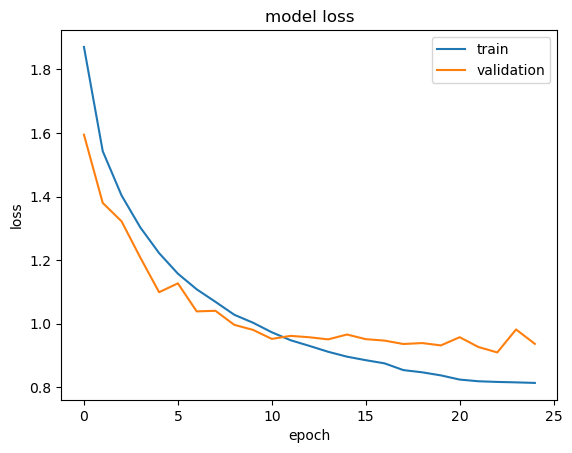

In [78]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

### Visualising Accuracy in each epoch

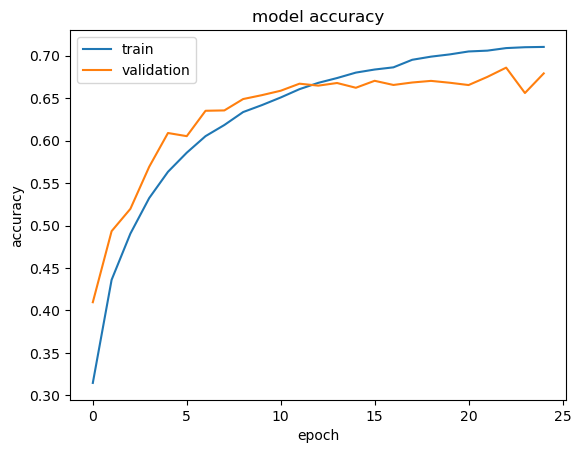

In [79]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

### Saving the model

In [86]:
import h5py
cnn.save_weights("Cifar10_CNN_ModelWeights.h5")
cnn_json = cnn.to_json()
with open("Cifar10_CNN_ModelStructure.json", "w") as json_file:
    json_file.write(cnn_json)

# Part 3 - Loading and Comparing the two models

### Loading

In [88]:
# Loading MLP model

json_file = open("Cifar10_MLP_ModelStructure.json", 'r')
mlp_loaded = model_from_json(json_file.read())
json_file.close()
mlp_loaded.load_weights("Cifar10_MLP_ModelWeights.h5")

# Loading CNN Model

json_file = open("Cifar10_CNN_ModelStructure.json", 'r')
cnn_loaded = model_from_json(json_file.read())
json_file.close()
cnn_loaded.load_weights("Cifar10_CNN_ModelWeights.h5")

### Model Summaries

In [89]:
mlp_loaded.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              3146752   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 256)               262400    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                8224      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                3

In [90]:
cnn_loaded.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 conv2d_21 (Conv2D)          (None, 28, 28, 16)        2320      
                                                                 
 conv2d_22 (Conv2D)          (None, 13, 13, 32)        4640      
                                                                 
 conv2d_23 (Conv2D)          (None, 6, 6, 64)          18496     
                                                                 
 dropout_5 (Dropout)         (None, 6, 6, 64)          0         
                                                                 
 flatten_5 (Flatten)         (None, 2304)              0         
                                                                 
 dropout_6 (Dropout)         (None, 2304)             

### Testing the models

In [92]:
X_test_MLP = np.reshape(X_test, (num_test_samples, flattened_len))

In [94]:
sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
mlp_loaded.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
score = mlp_loaded.evaluate(X_test_MLP,Y_test)
print(f"%age accuracy of MLP = {score[1]*100:.2f}%")

sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
cnn_loaded.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
score = cnn_loaded.evaluate(X_test,Y_test)
print(f"%age accuracy of CNN = {score[1]*100:.2f}%")

313/313 [==============================] - 1s 3ms/step - loss: 1.4531 - accuracy: 0.4883
%age accuracy of MLP = 48.83%
313/313 [==============================] - 2s 5ms/step - loss: 0.9630 - accuracy: 0.6727
%age accuracy of CNN = 67.27%


## Conclusion: Using CNN improves the accuracy by a great amount. The accuracy can further be increased by reducing the overfitting of the model.